<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-08 22:02:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  61.5MB/s    in 3.3s    

2025-09-08 22:02:24 (61.8 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib
!pip install seaborn

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


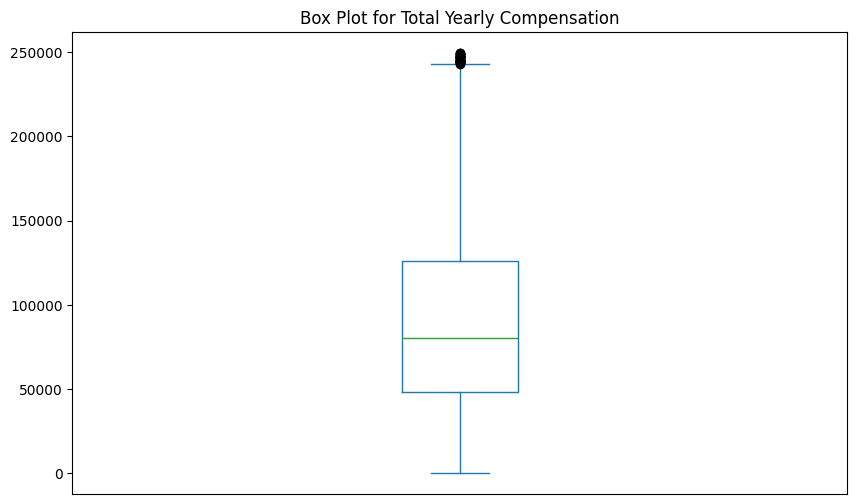

In [8]:
# your code goes here
# Pulling Data
query='''
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.75)]
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df["LogCompTotal"] = np.log1p(df["CompTotal"])


# Plotting
df['CompTotal'].plot(kind='box', figsize=(10,6))
plt.title('Box Plot for Total Yearly Compensation')
plt.xticks([])
plt.xlabel('')
plt.ylabel('')
plt.show()


**Note:** The original compensation data was highly right-skewed, with extreme outliers making the box plot unreadable. To visualize the pay distribution meaningfully, the top 25% of earners were removed.

This helps expose the central tendency and visible pay gaps in the dataset.

The reasons behind these disparities are unclear without deeper analysis. Potential contributing factors may include:
- Local job market differences
- Geographical location
- Seniority or leadership roles
- Years of professional coding experience
- Whether the job involves coding directly or indirectly

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


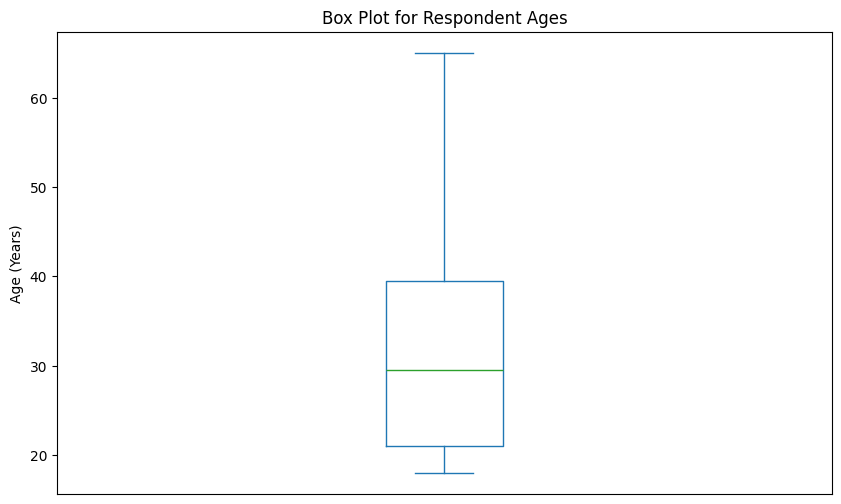

In [9]:
# Code goes here
# Pulling data from DB
query = '''
SELECT Age
FROM main
WHERE Age IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning
age_mapping = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}
df['AgeMapped'] = df['Age'].map(age_mapping)

df['AgeMapped'].plot(kind='box', figsize=(10,6))
plt.title('Box Plot for Respondent Ages')
plt.ylabel('Age (Years)')
plt.xlabel('')
plt.xticks([])
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


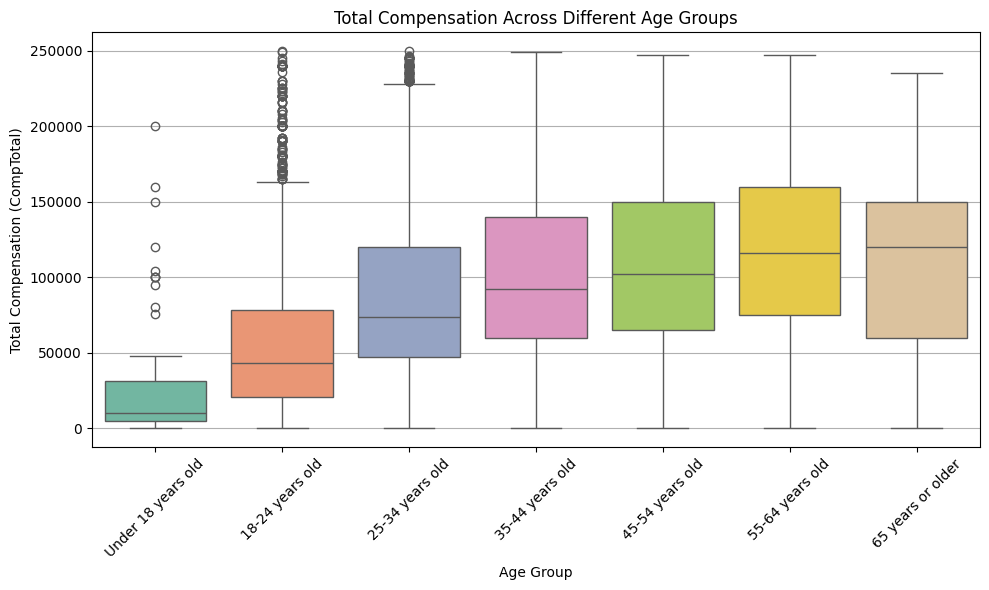

In [10]:
# Code goes here
# Pulling data from db
query = '''
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
AND CompTotal IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Map the Age column to midpoints of age ranges
age_mapping = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}
df['AgeMapped'] = df['Age'].map(age_mapping)

# Cleaning
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.75)]
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Define the age groups
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)

# Plot a box chart
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Age', y='CompTotal', hue='Age', legend=False, palette='Set2')

plt.title('Total Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


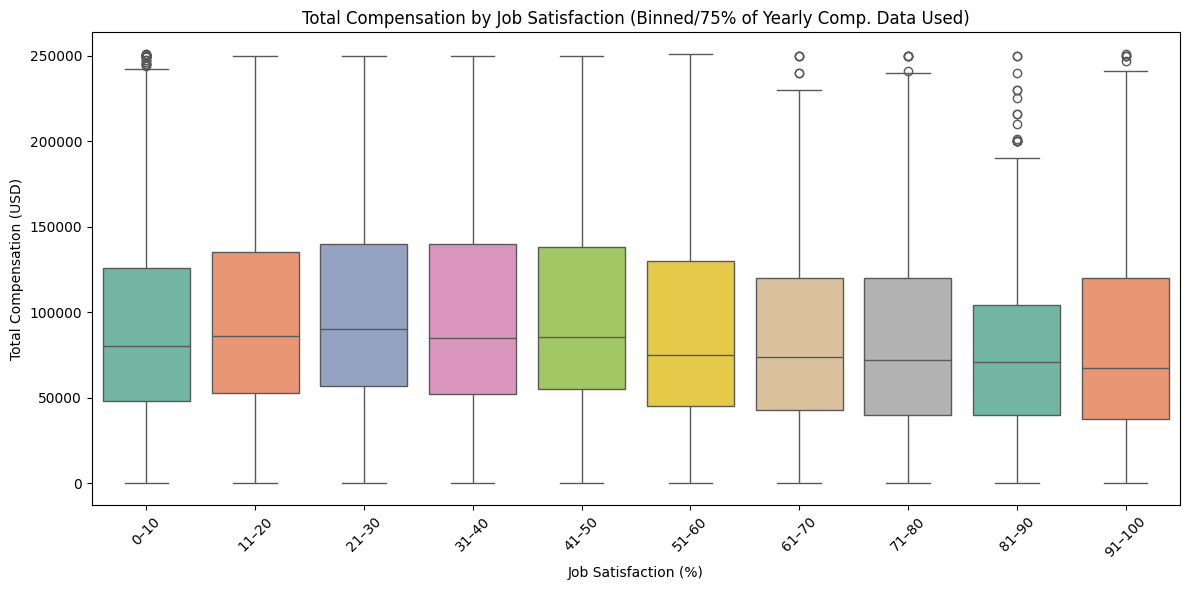

In [11]:
# Code goes here
# Pulling data from db
query='''
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Cleaning and Grouping
df = df[df['CompTotal'] < df['CompTotal'].quantile(0.75)]

# Binning JobSatPoints_6
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    '0–10', '11–20', '21–30', '31–40', '41–50',
    '51–60', '61–70', '71–80', '81–90', '91–100'
]
df['SatisfactionRange'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Drop missing bins
df = df.dropna(subset=['SatisfactionRange'])

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='SatisfactionRange', y='CompTotal', hue='SatisfactionRange', palette='Set2')

plt.title('Total Compensation by Job Satisfaction (Binned/75% of Yearly Comp. Data Used)')
plt.xlabel('Job Satisfaction (%)')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


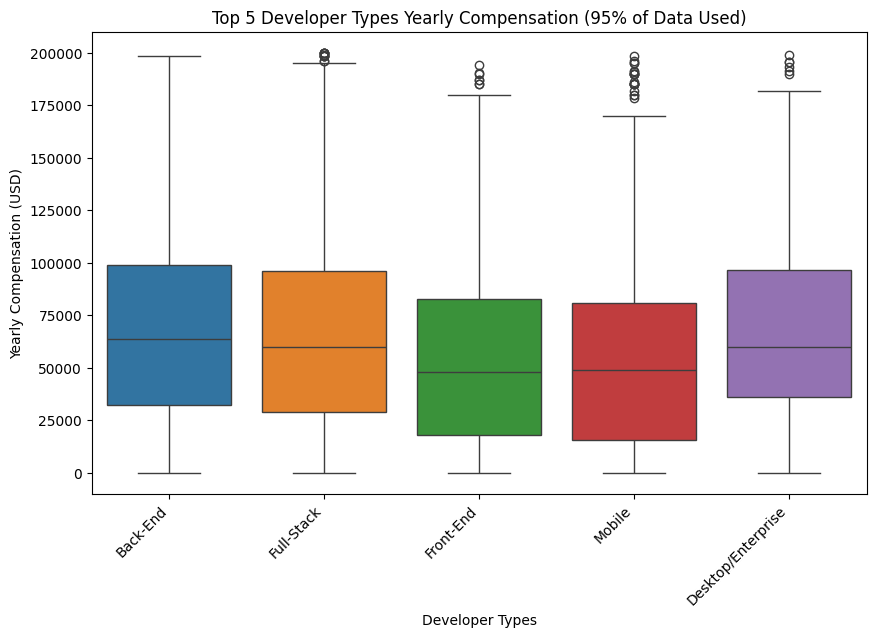

In [12]:
# your code goes here
# Pulling data from db
query = '''
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Mapping
type_mapping = {
    'Developer, full-stack': 'Full-Stack',
    'Developer, back-end': 'Back-End',
    'Developer, front-end': 'Front-End',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise',
    'Developer, mobile': 'Mobile'
}

# Identify the top 5 Dev Types and cleaning data
top5_devtype = df['DevType'].value_counts().head(5).index.tolist()
df_top = df[df['DevType'].isin(top5_devtype)]
df_top.loc[:,'DevType'] = df_top['DevType'].map(type_mapping)
df_top = df_top[df_top['ConvertedCompYearly'] < df_top['ConvertedCompYearly'].quantile(0.95)]

# Plotting
plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='DevType', y='ConvertedCompYearly', hue='DevType')
plt.title('Top 5 Developer Types Yearly Compensation (95% of Data Used)')
plt.xlabel('Developer Types')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


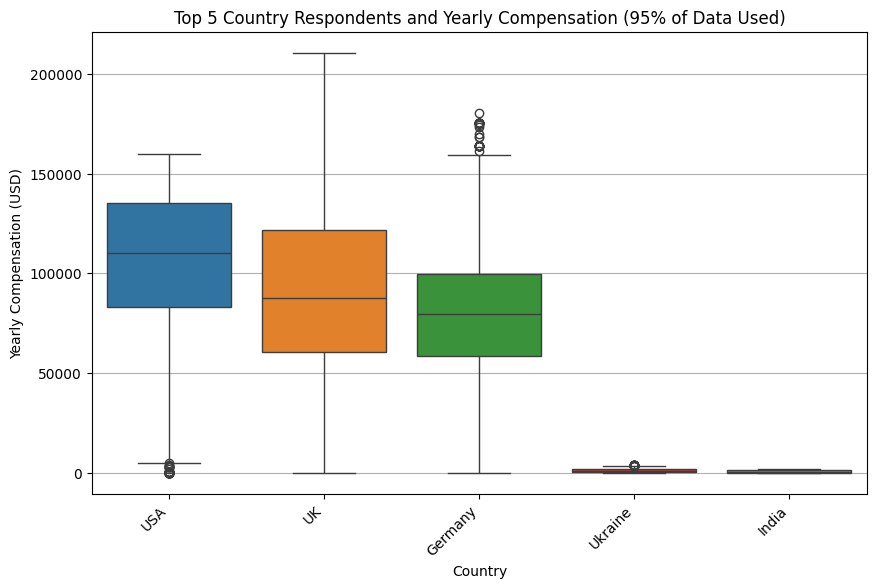

In [13]:
# Code goes here
# Pulling data from db
query='''
SELECT Country, CompTotal
FROM main
WHERE Country IS NOT NULL
AND CompTotal IS NOT NULL
'''
df= pd.read_sql_query(query, conn)

# Mapping of Countries for renaming
mapping_country = {
    'United States of America': 'USA',
    'Germany': 'Germany',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Ukraine': 'Ukraine',
    'India': 'India'
}
# Exchange Rates
currency_conversion = {
    'USA': 1,
    'Germany': 1.17,  # EUR to USD
    'UK': 1.35,        # GBP to USD
    'India': 0.012,    # INR to USD
    'Ukraine': 0.024   # UAH to USD
}

# Identify the top 5 Country respondents and cleaning data
top5_country = df['Country'].value_counts().head(5).index.tolist()
df_top = df[df['Country'].isin(top5_country)]
df_top.loc[:,'Country'] = df_top['Country'].map(mapping_country)
df_top = df_top[df_top['CompTotal'] < df_top['CompTotal'].quantile(0.67)]

# Applying conversion rates to get proper data
df_top['CompTotalUSD'] = df_top.apply(lambda row: row['CompTotal'] * currency_conversion[row['Country']], axis=1)

# Plotting
plt.figure(figsize=(10,6))
sns.boxplot(data=df_top, x='Country', y='CompTotalUSD', hue='Country')
plt.title('Top 5 Country Respondents and Yearly Compensation (95% of Data Used)')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Analysis: Compensation by Country (Box Plot)**
Due to inconsistencies in currency representation, I applied conversion rate adjustments to normalize all compensation figures to USD. This was necessary because CompTotal values were reported in local currencies, causing misleading results — notably showing India as having the highest median compensation.

Even after removing the top 1% of outliers, the distortion remained. It wasn’t until filtering out 33% of the top compensation values that the plot reflected more realistic trends.

Findings:
- USA, Germany, and UK show significantly higher median compensation.
- India and Ukraine display substantially lower compensation, highlighting global disparities.
- These gaps could stem from currency strength, cost of living, market demand, and localized salary expectations.

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


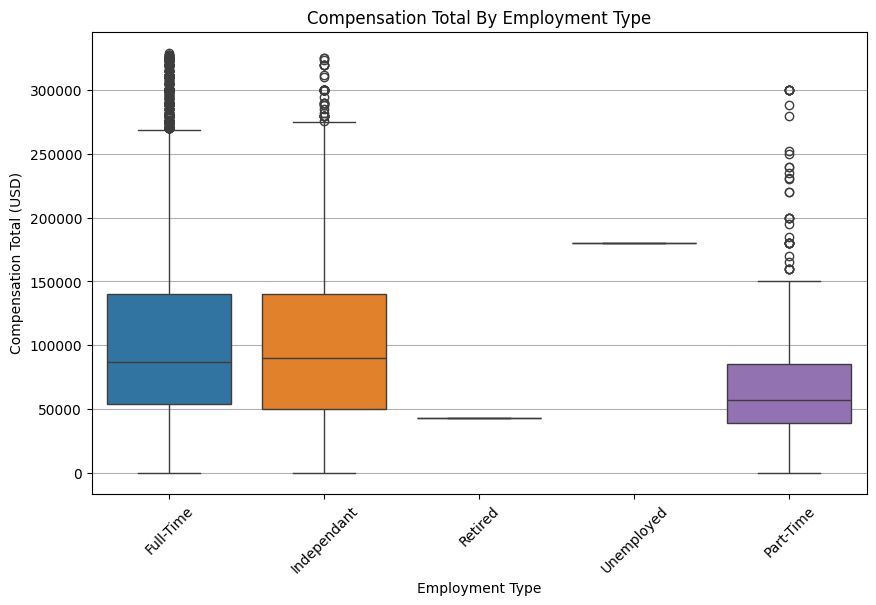

In [14]:
# Code goes here
query = '''
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL
AND Employment NOT LIKE '%;%'
'''
df=pd.read_sql_query(query, conn)

# Mapping
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Cleaning
df.loc[:,'Employment']= df['Employment'].map(mapping_employment)
filtered_df = df[df['CompTotal'] < df['CompTotal'].quantile(0.78)]

# Plotting
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='Employment', y='CompTotal', hue='Employment')
plt.title('Compensation Total By Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Compensation Total (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
#plt.tight_layout()
plt.show()

**Analysis: Compensation Total By Employment Type**
With 78% of the data retained (after removing the top 22% as outliers), we observe that independent contractors tend to have a slightly higher overall compensation compared to full-time employees. In contrast, part-time workers generally earn less, with their maximum compensation just barely exceeding the third quartile of full-time workers.

It should also be noted that during the data cleaning process, we excluded more complex cases where respondents reported multiple employment types. This is a significant limitation, as it narrows the analysis to only those with a single, clearly defined employment status. In reality, many individuals may be students who work part-time, full-time employees with freelance side work, or engaged in multiple roles simultaneously.

As a result, this box plot reflects only about 43% of respondents who reported a single employment situation. While this still provides valuable insight, it should be interpreted as a partial view of the broader respondent population.

However, caution is needed when interpreting certain categories. For example, a single data point from an unemployed respondent reports a higher compensation than the maximum seen among part-time workers — clearly an anomaly. Similarly, the retired category is represented by only one respondent whose compensation falls within the lower quartile of the overall distribution.

These extremely small sample sizes (n=1) in some categories make them statistically unreliable, and any conclusions drawn from them should be viewed with skepticism.

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


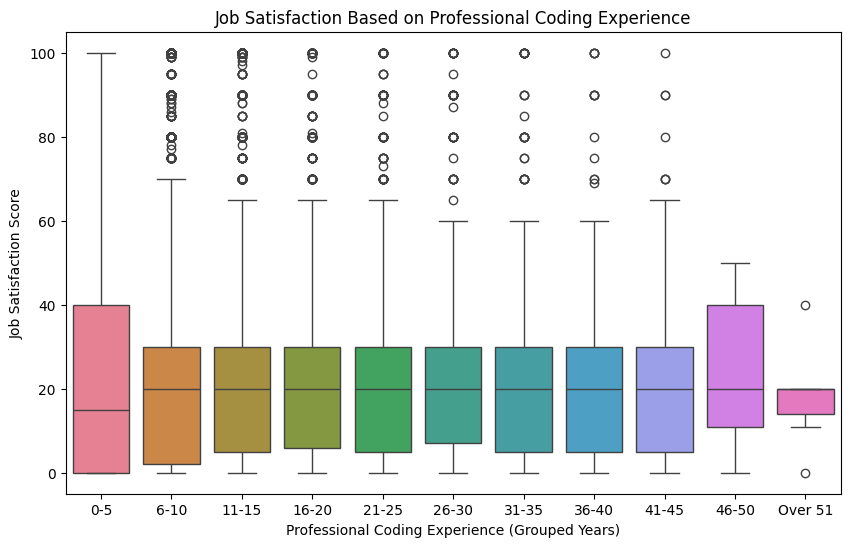

In [15]:
# Code goes here
query ='''
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df=pd.read_sql_query(query, conn)
df['YearsCodePro'].value_counts()

mapping_codeyear = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

df['YearsCodePro'] = df['YearsCodePro'].replace(mapping_codeyear)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define custom bins and labels
bins = [-1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40',
          '41-45', '46-50', 'Over 51']

# Apply pd.cut to assign to respective groups and count
df['YearsGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, ordered=True)
years_count = df['YearsGroup'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='YearsGroup', y='JobSatPoints_6', hue='YearsGroup', legend=False)
plt.title('Job Satisfaction Based on Professional Coding Experience')
plt.xlabel('Professional Coding Experience (Grouped Years)')
plt.ylabel('Job Satisfaction Score')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [16]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
